In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hydranerv.models.network.neuron import Neuron
from hydranerv.models.network.network import Network

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

In [4]:
N = 50
GC = 200
DENSITY = .3
TMAX = 1000
T_REF = .1
WNOISE = 5000

In [5]:
def simulate(num_pacemakers):
    
    P = num_pacemakers
    
    # define edges
    edges = []
    np.random.seed(135)
    for i in range(N):
        for j in range(i+1, N):
            if np.random.rand() < DENSITY and (i, j) not in edges:
                edges.append((i, j))

    # initiate network
    ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction', wnoise=WNOISE)
    
    # run simulation
    ntwk.run()
    
    # display result
    ntwk.disp(figsize=(10, 10), style='spike', dpi=100)
    
    # display single
    plt.figure(figsize=(15,3))
    plt.plot(ntwk.neurons[25].v_train, lw=.5)
    plt.show()

## 10 pacemakers

100%|██████████| 99999/99999 [00:55<00:00, 1797.48it/s]


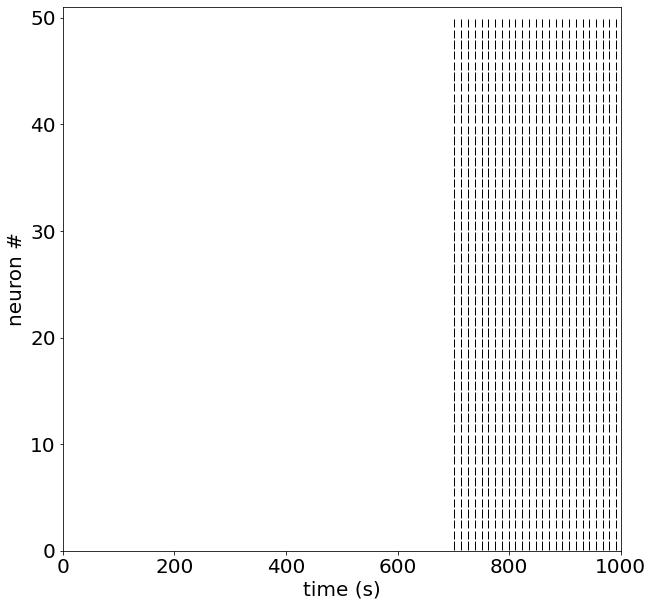

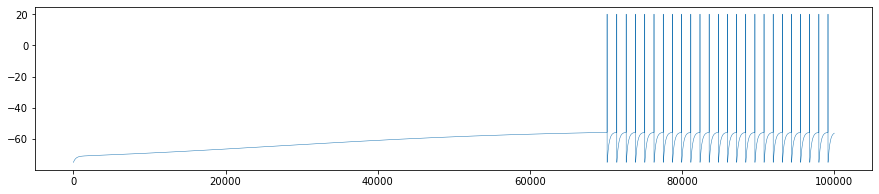

In [6]:
simulate(10)

## 12 pacemakers

100%|██████████| 99999/99999 [00:53<00:00, 1886.62it/s]


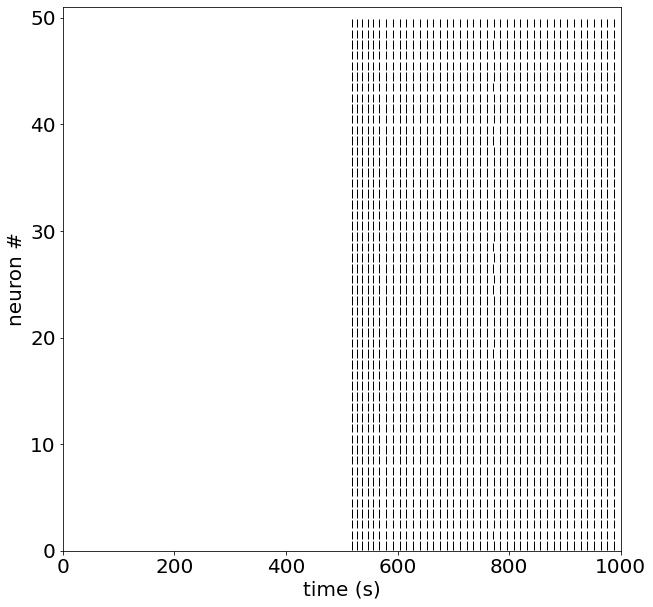

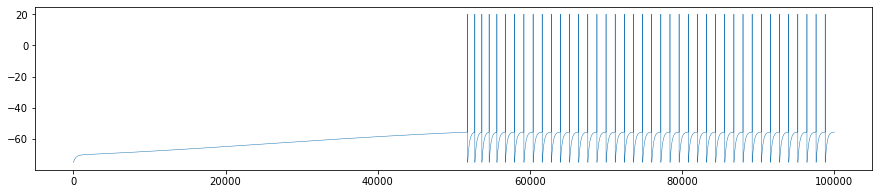

In [13]:
simulate(12)

## 13 pacemakers

100%|██████████| 99999/99999 [00:53<00:00, 1853.95it/s]


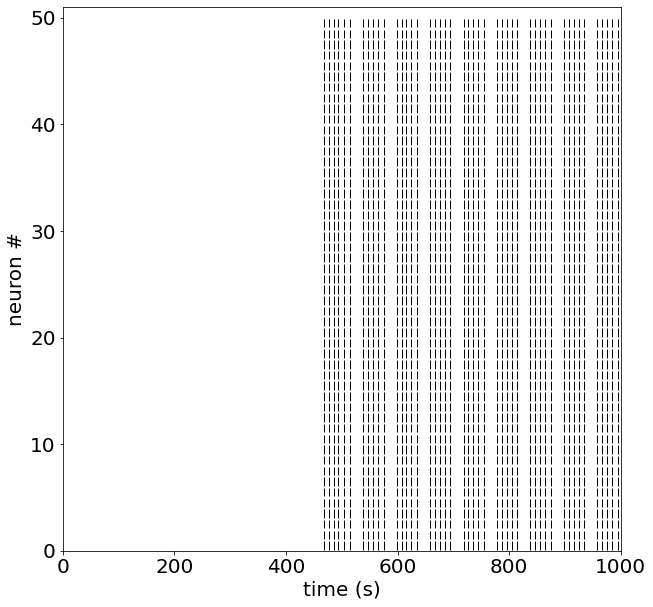

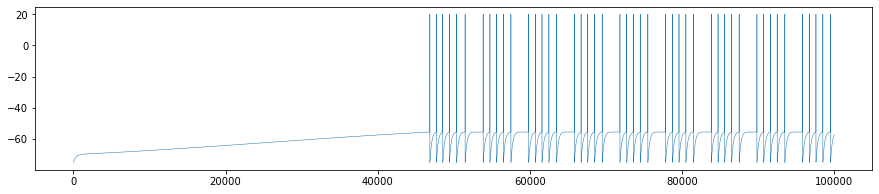

In [15]:
simulate(13)

## 30 pacemakers

100%|██████████| 99999/99999 [00:59<00:00, 1680.03it/s]


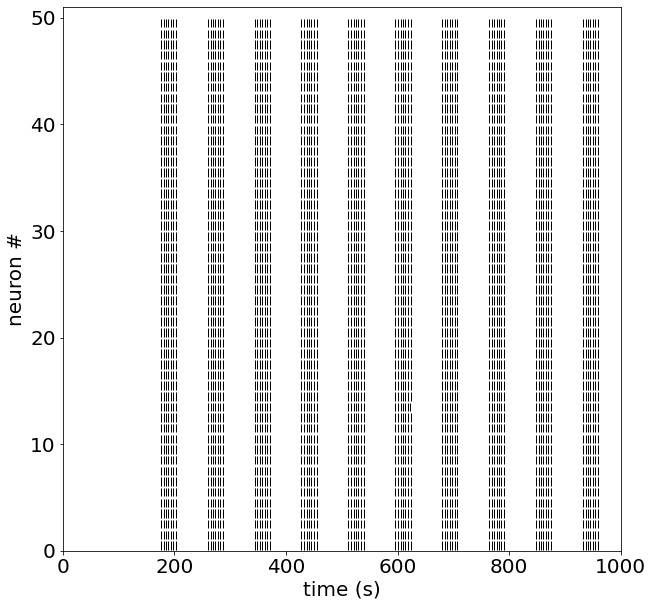

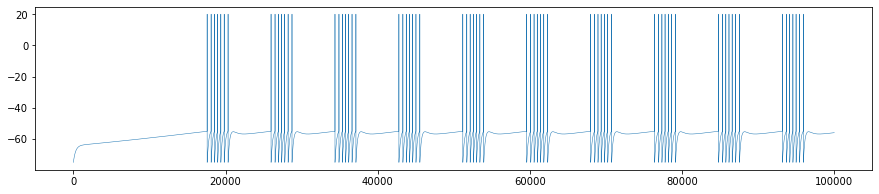

In [7]:
simulate(30)

## 50 pacemakers

100%|██████████| 99999/99999 [01:00<00:00, 1639.34it/s]


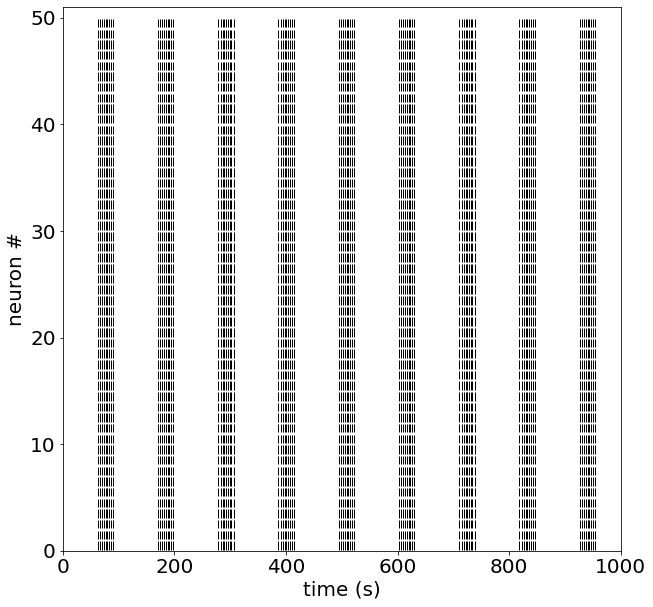

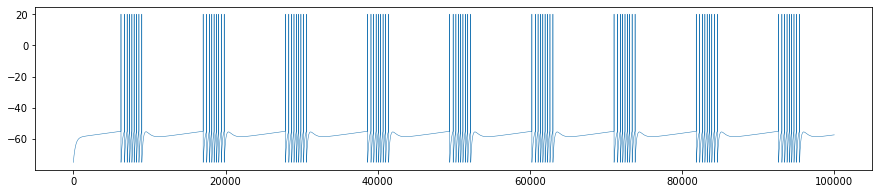

In [11]:
simulate(50)